In [6]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt 
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import seaborn as sns


In [7]:
mass_data = pd.read_csv("../eco_v_nukes/data/18-07-24 09_35_36_theglobaleconomy.csv")
mass_data.head()

,Country,Code,ContinentCode,Year,Economic growth: the rate of change of real GDP,GDP per capita current U.S. dollars,GDP per capita Purchasing Power Parity,GDP per capita constant 2010 dollars,Trade openness: exports plus imports as percent of GDP,Government spending as percent of GDP,...,Oil production thousand barrels per day,Gasoline production thousand barrels per day,Liquefied petroleum gas production thousand barrels per day,Nuclear electricity capacity million kilowatts,Nuclear power generation billion kilowatthours,Military spending in billion U.S. dollars,Military spending percent of GDP,Military spending percent of total government spending,Armed forces personnel,Human Development Index (0 - 1)
0,Afghanistan,AFG,AS,1960,NaN,62.37,NaN,NaN,11.16,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,AS,1961,NaN,62.44,NaN,NaN,12.55,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,AS,1962,NaN,60.95,NaN,NaN,14.23,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,AS,1963,NaN,82.02,NaN,NaN,26.04,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,AS,1964,NaN,85.51,NaN,NaN,26.94,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
mass_data.sample(10)

,Country,Code,ContinentCode,Year,Economic growth: the rate of change of real GDP,GDP per capita current U.S. dollars,GDP per capita Purchasing Power Parity,GDP per capita constant 2010 dollars,Trade openness: exports plus imports as percent of GDP,Government spending as percent of GDP,...,Oil production thousand barrels per day,Gasoline production thousand barrels per day,Liquefied petroleum gas production thousand barrels per day,Nuclear electricity capacity million kilowatts,Nuclear power generation billion kilowatthours,Military spending in billion U.S. dollars,Military spending percent of GDP,Military spending percent of total government spending,Armed forces personnel,Human Development Index (0 - 1)
492,Australia,AUS,OC,1988,5.75,14284.52,NaN,35388.13,32.57,18.46,...,520.02,273.0,12.0,0.0,0.0,5.84,2.16,7.04,NaN,NaN
7891,Peru,PER,SA,1990,-4.98,1194.55,5240.0,2695.37,29.47,7.27,...,128.90,29.0,4.0,0.0,0.0,0.78,2.68,NaN,125000.0,0.613
10435,Tuvalu,TUV,OC,2008,6.67,3103.04,3736.0,3245.63,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9219,Somalia,SOM,AF,2011,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.0,0.0,0.0,0.0,NaN,NaN,NaN,3200.0,NaN
3976,Guatemala,GTM,NaN,1998,4.99,1755.85,6338.0,3115.97,44.42,5.68,...,25.00,2.9,0.2,0.0,0.0,0.14,0.72,5.76,41200.0,0.531
2195,China,CHN,AS,2023,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5151,Jordan,JOR,AS,1977,8.30,1045.56,NaN,3094.64,116.03,27.11,...,NaN,NaN,NaN,NaN,NaN,0.26,12.53,NaN,NaN,NaN
6825,Mozambique,MOZ,AF,1984,-6.50,NaN,NaN,176.83,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,0.14,7.07,NaN,NaN,NaN
3126,Estonia,EST,EU,2018,3.78,23165.85,34980.0,19611.61,145.92,19.13,...,0.00,NaN,NaN,0.0,0.0,0.61,2.01,5.12,6700.0,0.882
9748,Switzerland,CHE,EU,1964,NaN,2501.29,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.33,2.54,NaN,NaN,NaN


In [9]:
mass_data.describe()

,Year,Economic growth: the rate of change of real GDP,GDP per capita current U.S. dollars,GDP per capita Purchasing Power Parity,GDP per capita constant 2010 dollars,Trade openness: exports plus imports as percent of GDP,Government spending as percent of GDP,Government spending billion USD,Government debt as percent of GDP,Economic growth forecast,Oil production thousand barrels per day,Gasoline production thousand barrels per day,Liquefied petroleum gas production thousand barrels per day,Nuclear electricity capacity million kilowatts,Nuclear power generation billion kilowatthours,Military spending in billion U.S. dollars,Military spending percent of GDP,Military spending percent of total government spending,Armed forces personnel,Human Development Index (0 - 1)
count,11157.000000,9603.000000,9959.000000,5911.000000,9619.000000,8285.000000,8100.000000,8178.000000,4961.000000,7593.000000,5327.000000,5496.000000,5496.000000,7631.000000,7631.000000,7829.000000,7512.000000,4247.000000,5.278000e+03,5594.000000
mean,1994.363090,3.724577,8987.942468,18297.364236,11598.141572,78.155067,15.821849,41.629101,55.546003,3.380615,550.501049,111.829896,16.480750,1.727853,11.411160,6.333228,2.714334,7.658834,1.669748e+05,0.660144
std,17.730054,6.309177,18178.200156,20650.061835,18933.300024,51.602307,6.714763,185.769018,44.088900,6.257111,1455.992217,631.421118,63.025122,8.962397,61.500703,39.384126,3.197292,6.497062,3.966437e+05,0.166521
min,1960.000000,-64.050000,11.790000,430.000000,122.880000,0.020000,0.000000,0.000000,0.000000,-54.340000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.220000,5.000000e+01,0.189000
25%,1980.000000,1.330000,578.220000,3626.000000,1312.925000,44.970000,11.130000,0.430000,28.570000,1.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.060000,1.190000,3.310000,1.145000e+04,0.535000
50%,1996.000000,3.830000,2044.320000,10402.000000,3637.420000,67.640000,15.150000,2.100000,47.600000,3.570000,16.000000,3.100000,0.300000,0.000000,0.000000,0.340000,1.890000,5.500000,3.725000e+04,0.685000
75%,2009.000000,6.310000,8302.130000,26662.000000,13591.355000,97.730000,19.250000,12.920000,69.760000,5.910000,287.235000,45.662500,7.475000,0.000000,0.000000,2.210000,3.150000,10.010000,1.475750e+05,0.791000
max,2023.000000,149.970000,240862.190000,157601.000000,228667.940000,442.620000,79.520000,3570.080000,600.120000,147.970000,12248.020000,9571.000000,776.520000,101.890000,809.410000,876.940000,117.350000,57.480000,4.135000e+06,0.962000


In [10]:
dropped_rows_df = mass_data.dropna()
print(dropped_rows_df)

        Country Code ContinentCode  Year  \
85      Albania  ALB            EU  1997   
86      Albania  ALB            EU  1998   
87      Albania  ALB            EU  1999   
88      Albania  ALB            EU  2000   
89      Albania  ALB            EU  2001   
...         ...  ...           ...   ...   
11143  Zimbabwe  ZWE            AF  2010   
11144  Zimbabwe  ZWE            AF  2011   
11145  Zimbabwe  ZWE            AF  2012   
11146  Zimbabwe  ZWE            AF  2013   
11147  Zimbabwe  ZWE            AF  2014   

       Economic growth: the rate of change of real GDP  \
85                                              -10.92   
86                                                8.83   
87                                               12.89   
88                                                6.95   
89                                                8.29   
...                                                ...   
11143                                            21.45   
11144  

In [11]:
dropped_cols_df = mass_data.dropna()
print(dropped_cols_df)

        Country Code ContinentCode  Year  \
85      Albania  ALB            EU  1997   
86      Albania  ALB            EU  1998   
87      Albania  ALB            EU  1999   
88      Albania  ALB            EU  2000   
89      Albania  ALB            EU  2001   
...         ...  ...           ...   ...   
11143  Zimbabwe  ZWE            AF  2010   
11144  Zimbabwe  ZWE            AF  2011   
11145  Zimbabwe  ZWE            AF  2012   
11146  Zimbabwe  ZWE            AF  2013   
11147  Zimbabwe  ZWE            AF  2014   

       Economic growth: the rate of change of real GDP  \
85                                              -10.92   
86                                                8.83   
87                                               12.89   
88                                                6.95   
89                                                8.29   
...                                                ...   
11143                                            21.45   
11144  

In [12]:
mass_data.head(10)

,Country,Code,ContinentCode,Year,Economic growth: the rate of change of real GDP,GDP per capita current U.S. dollars,GDP per capita Purchasing Power Parity,GDP per capita constant 2010 dollars,Trade openness: exports plus imports as percent of GDP,Government spending as percent of GDP,...,Oil production thousand barrels per day,Gasoline production thousand barrels per day,Liquefied petroleum gas production thousand barrels per day,Nuclear electricity capacity million kilowatts,Nuclear power generation billion kilowatthours,Military spending in billion U.S. dollars,Military spending percent of GDP,Military spending percent of total government spending,Armed forces personnel,Human Development Index (0 - 1)
0,Afghanistan,AFG,AS,1960,NaN,62.37,NaN,NaN,11.16,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,AS,1961,NaN,62.44,NaN,NaN,12.55,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,AS,1962,NaN,60.95,NaN,NaN,14.23,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,AS,1963,NaN,82.02,NaN,NaN,26.04,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,AS,1964,NaN,85.51,NaN,NaN,26.94,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Afghanistan,AFG,AS,1965,NaN,105.24,NaN,NaN,32.67,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Afghanistan,AFG,AS,1966,NaN,143.10,NaN,NaN,27.14,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Afghanistan,AFG,AS,1967,NaN,167.17,NaN,NaN,20.98,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Afghanistan,AFG,AS,1968,NaN,134.01,NaN,NaN,24.11,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Afghanistan,AFG,AS,1969,NaN,134.25,NaN,NaN,25.08,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
combined_cleaned_df= pd.concat([dropped_cols_df, dropped_rows_df])
combined_cleaned_df

,Country,Code,ContinentCode,Year,Economic growth: the rate of change of real GDP,GDP per capita current U.S. dollars,GDP per capita Purchasing Power Parity,GDP per capita constant 2010 dollars,Trade openness: exports plus imports as percent of GDP,Government spending as percent of GDP,...,Oil production thousand barrels per day,Gasoline production thousand barrels per day,Liquefied petroleum gas production thousand barrels per day,Nuclear electricity capacity million kilowatts,Nuclear power generation billion kilowatthours,Military spending in billion U.S. dollars,Military spending percent of GDP,Military spending percent of total government spending,Armed forces personnel,Human Development Index (0 - 1)
85,Albania,ALB,EU,1997,-10.92,717.38,4400.0,1464.30,45.43,10.45,...,6.0,1.70,0.01,0.0,0.0,0.03,1.28,4.42,67500.0,0.639
86,Albania,ALB,EU,1998,8.83,813.79,4819.0,1603.65,48.14,10.84,...,6.0,1.70,0.01,0.0,0.0,0.03,1.24,3.58,67500.0,0.649
87,Albania,ALB,EU,1999,12.89,1033.24,5475.0,1821.87,51.01,11.06,...,5.0,0.60,0.01,0.0,0.0,0.04,1.25,3.58,67500.0,0.660
88,Albania,ALB,EU,2000,6.95,1126.68,5893.0,1960.88,63.45,9.69,...,5.0,0.84,0.04,0.0,0.0,0.05,1.25,3.84,67500.0,0.667
89,Albania,ALB,EU,2001,8.29,1281.66,6441.0,2143.53,66.49,10.63,...,5.0,0.82,0.04,0.0,0.0,0.05,1.31,4.15,40500.0,0.673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11143,Zimbabwe,ZWE,AF,2010,21.45,937.84,1800.0,1096.84,83.12,15.32,...,0.0,0.00,0.00,0.0,0.0,0.10,0.82,4.51,50800.0,0.472
11144,Zimbabwe,ZWE,AF,2011,14.62,1082.62,2033.0,1239.24,89.47,18.77,...,0.0,0.00,0.00,0.0,0.0,0.20,1.41,6.06,50800.0,0.490
11145,Zimbabwe,ZWE,AF,2012,15.74,1290.19,2311.0,1408.46,74.16,20.01,...,0.0,0.00,0.00,0.0,0.0,0.32,1.86,9.11,50800.0,0.516
11146,Zimbabwe,ZWE,AF,2013,3.20,1408.37,2334.0,1422.38,58.66,18.44,...,0.0,0.00,0.00,0.0,0.0,0.36,1.87,8.93,50800.0,0.527


In [14]:
testing_df = combined_cleaned_df.columns.tolist()
testing_df


['Country',
 'Code',
 'ContinentCode',
 'Year',
 'Economic growth: the rate of change of real GDP',
 'GDP per capita current U.S. dollars',
 'GDP per capita Purchasing Power Parity',
 'GDP per capita constant 2010 dollars',
 'Trade openness: exports plus imports as percent of GDP',
 'Government spending as percent of GDP',
 'Government spending billion USD',
 'Government debt as percent of GDP',
 'Economic growth forecast',
 'Oil production thousand barrels per day',
 'Gasoline production thousand barrels per day',
 'Liquefied petroleum gas production thousand barrels per day',
 'Nuclear electricity capacity million kilowatts',
 'Nuclear power generation billion kilowatthours',
 'Military spending in billion U.S. dollars',
 'Military spending percent of GDP',
 'Military spending percent of total government spending ',
 'Armed forces personnel',
 'Human Development Index (0 - 1)']

In [ ]:
data = {
    'Country': ['USA', 'China', 'India', 'Brazil', 'South Africa'],
    'Human Development Index (0 - 1)': [0.926, 0.758, 0.645, 0.699, 0.711],
    'Economic growth: the rate of change of real GDP': [2.3, 6.0, 5.0, 1.0, 3.0],
    'Latitude': [37.0902, 35.8617, 20.5937, -14.2350, -30.5595],
    'Longitude': [-95.7129, 104.1954, 78.9629, -51.9253, 22.9375]
}
avg_df = pd.DataFrame(data)

# Create globe plot with Plotly
fig = px.scatter_geo(avg_df, 
                     locations='Country', 
                     locationmode='country names', 
                     size='Economic growth: the rate of change of real GDP',
                     color='Human Development Index (0 - 1)',
                     hover_name='Country',
                     size_max=100,
                     title='Average Human Development Index vs Average Economic Growth by Country')

# Customize layout for better readability
fig.update_layout(
    title=dict(font=dict(size=16)),
    geo=dict(
        showland=True,
        landcolor='lightgray',
        showocean=True,
        oceancolor='lightblue',
        projection=dict(type='orthographic'),  # Choose projection type
        showcoastlines=True,
        coastlinecolor='black',
        showcountries=True,
        countrycolor='black'
    ),
    coloraxis_colorbar=dict(
        title='Human Development Index',
        tickvals=[0.6, 0.7, 0.8, 0.9],
        ticktext=['0.6', '0.7', '0.8', '0.9']
    )
)

# Show the plot
fig.show()

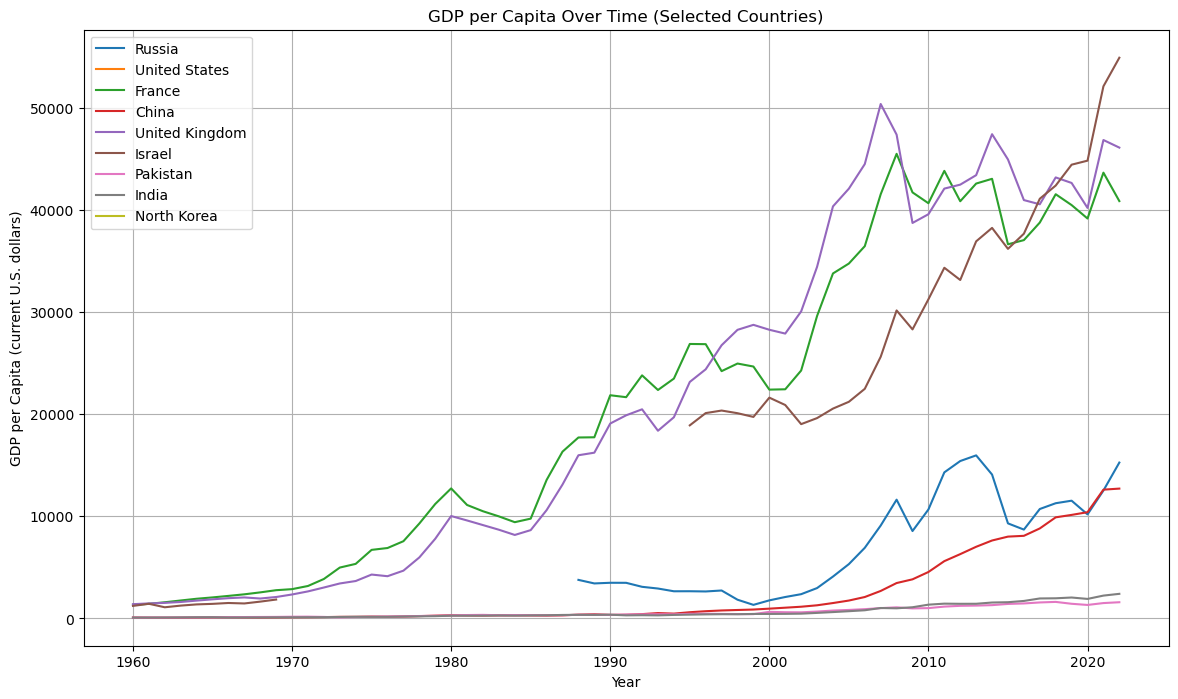

In [19]:
# Filter the data for the selected countries
selected_countries = ['Russia', 'United States', 'France', 'China', 'United Kingdom', 'Israel', 'Pakistan', 'India', 'North Korea']
trend_data = mass_data[mass_data['Country'].isin(selected_countries)]

# Plot GDP per capita over time for the selected countries
plt.figure(figsize=(14, 8))
for country in selected_countries:
    country_data = trend_data[trend_data['Country'] == country]
    plt.plot(country_data['Year'], country_data['GDP per capita current U.S. dollars'], label=country)

plt.title('GDP per Capita Over Time (Selected Countries)')
plt.xlabel('Year')
plt.ylabel('GDP per Capita (current U.S. dollars)')
plt.legend()
plt.grid(True)
plt.show()

The plot now shows the GDP per capita over time for the selected countries. This trend analysis provides a visual representation of how the economic health of these countries has evolved over the years.

1.	Economic Growth Trends:
	•	USA: The GDP per capita has generally increased over time, indicating steady economic growth.
	•	France, UK, Israel: Similar to the USA, these countries have shown a consistent rise in GDP per capita, although the rates of increase vary.
	•	China: Notable for its sharp rise in GDP per capita starting from the late 20th century, reflecting rapid economic growth and development.
	•	India: Shows significant growth, particularly from the early 2000s, indicating economic development.
	•	Russia: Shows fluctuations, with a noticeable drop around the early 1990s due to the dissolution of the Soviet Union, followed by recovery and growth.
	•	Pakistan, North Korea: Generally lower GDP per capita compared to other countries, with more modest or stagnant growth.
2.	Economic Disparities:
	•	Countries like the USA, France, and the UK have consistently higher GDP per capita, indicating higher standards of living and more developed economies.
	•	Countries like Pakistan and North Korea have much lower GDP per capita, indicating lower economic development and standards of living.
3.	Economic Events and Shifts:
	•	The fluctuations in Russia’s GDP per capita around the early 1990s reflect the economic turmoil following the collapse of the Soviet Union.
	•	The rapid growth in China’s GDP per capita from the late 1970s onward aligns with its economic reforms and opening up to global trade and investment.

This graph provides a historical perspective on the economic performance of these countries, highlighting trends and key events that have impacted their economies.

All Summarized Up
The graph shows GDP per capita trends for nine countries over time. The USA, France, UK, and Israel have steadily increasing GDP per capita, indicating consistent economic growth. China and India show significant rises starting from the late 20th century, reflecting rapid development. Russia experienced a dip in the early 1990s due to the Soviet Union’s collapse but later recovered. Pakistan and North Korea have much lower GDP per capita, indicating less economic development and slower growth.


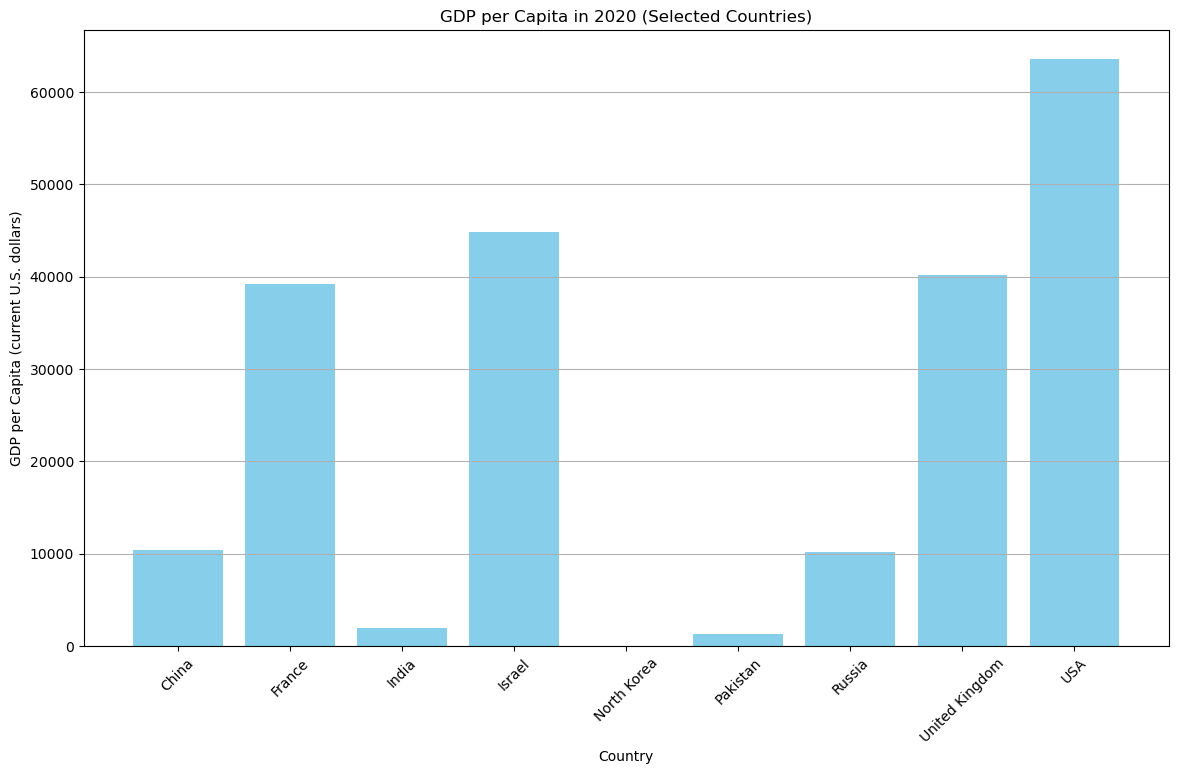

In [22]:

# Update selected countries with the correct names
selected_countries_corrected = ['Russia', 'USA', 'France', 'China', 'United Kingdom', 'Israel', 'Pakistan', 'India', 'North Korea']

# Filter the data for the selected countries with corrected names
trend_data_corrected = mass_data[mass_data['Country'].isin(selected_countries_corrected)]

# Filter the data for the year 2020
comparison_year = 2020
comparison_data = trend_data_corrected[trend_data_corrected['Year'] == comparison_year]

# Plot GDP per capita for the selected countries in 2020
plt.figure(figsize=(14, 8))
plt.bar(comparison_data['Country'], comparison_data['GDP per capita current U.S. dollars'], color='skyblue')
plt.title('GDP per Capita in 2020 (Selected Countries)')
plt.xlabel('Country')
plt.ylabel('GDP per Capita (current U.S. dollars)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

The bar chart shows the GDP per capita for the selected countries in 2020. Here’s a summary of what it indicates:

	•	USA: The highest GDP per capita among the selected countries, indicating a very high standard of living and a developed economy.
	•	United Kingdom, France, Israel: These countries also have high GDP per capita, reflecting strong economies and high standards of living.
	•	China: Significant GDP per capita, reflecting its rapid economic growth and development.
	•	Russia, India, Pakistan, North Korea: Lower GDP per capita compared to the other countries, indicating varying levels of economic development, with North Korea having the lowest among them.

This visualization provides a snapshot of the economic standing of these countries in 2020, highlighting disparities in economic health.

All summarized Up:

The bar chart shows the GDP per capita for nine selected countries in 2020. The USA has the highest GDP per capita, indicating a very high standard of living. The UK, France, and Israel also show high GDP per capita, reflecting strong economies. China has a significant GDP per capita, showcasing its rapid economic growth. Russia, India, Pakistan, and North Korea have lower GDP per capita, with North Korea having the lowest, indicating varying levels of economic development among these countries.

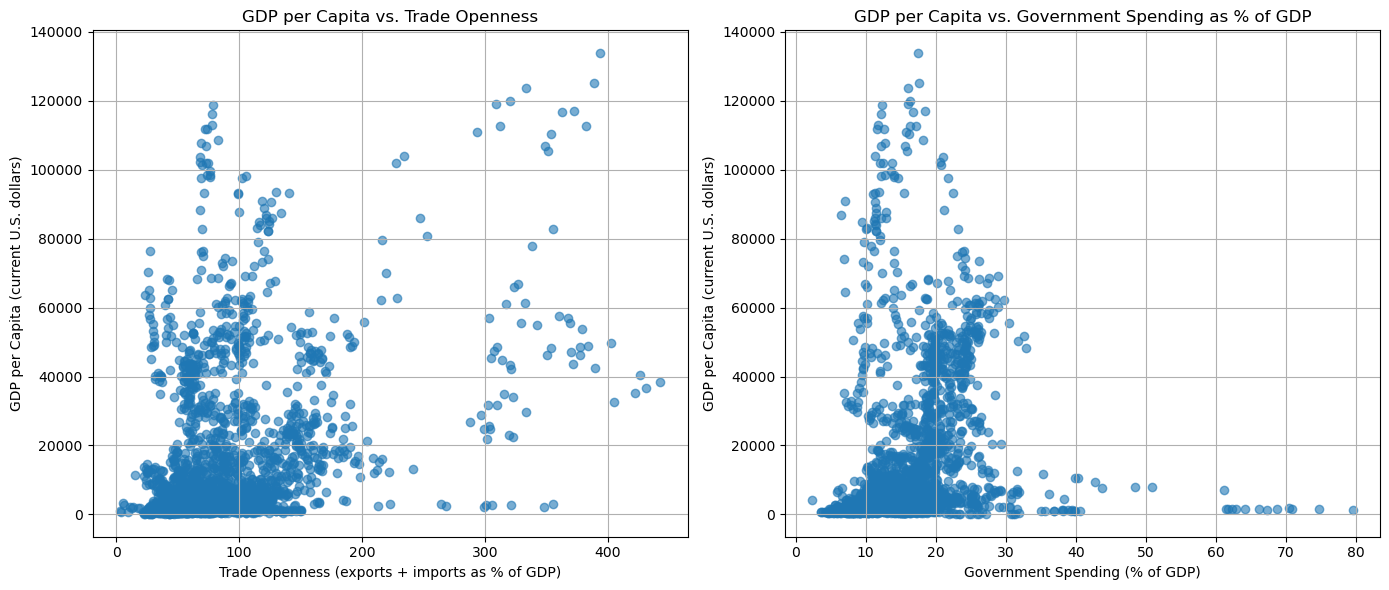

In [23]:
recent_years = mass_data['Year'] >= 2010
recent_data = mass_data[recent_years]

# Select relevant columns for analysis
selected_columns = ['Country', 'Year', 'GDP per capita current U.S. dollars', 
                    'Trade openness: exports plus imports as percent of GDP', 
                    'Government spending as percent of GDP']

recent_data_selected = recent_data[selected_columns]

# Plot GDP per capita vs. Trade Openness
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(recent_data_selected['Trade openness: exports plus imports as percent of GDP'], recent_data_selected['GDP per capita current U.S. dollars'], alpha=0.6)
plt.title('GDP per Capita vs. Trade Openness')
plt.xlabel('Trade Openness (exports + imports as % of GDP)')
plt.ylabel('GDP per Capita (current U.S. dollars)')
plt.grid(True)

# Plot GDP per capita vs. Government Spending as Percent of GDP
plt.subplot(1, 2, 2)
plt.scatter(recent_data_selected['Government spending as percent of GDP'], recent_data_selected['GDP per capita current U.S. dollars'], alpha=0.6)
plt.title('GDP per Capita vs. Government Spending as % of GDP')
plt.xlabel('Government Spending (% of GDP)')
plt.ylabel('GDP per Capita (current U.S. dollars)')
plt.grid(True)

plt.tight_layout()
plt.show()

The scatter plots show the relationships between GDP per capita and two economic indicators:

	1.	GDP per Capita vs. Trade Openness:
	•	This plot shows how GDP per capita relates to the trade openness (exports plus imports as a percentage of GDP) for various countries.
	•	We can see that there is no clear linear correlation, but countries with higher GDP per capita tend to have varying levels of trade openness. Some high GDP countries are highly open to trade, while others are less so.
	2.	GDP per Capita vs. Government Spending as Percent of GDP:
	•	This plot shows how GDP per capita relates to government spending as a percentage of GDP.
	•	Similar to the first plot, there is no clear linear correlation. Countries with high GDP per capita have different levels of government spending relative to their GDP. Some high GDP countries have high government spending, while others do not.

These plots indicate that GDP per capita does not have a straightforward relationship with trade openness or government spending as a percentage of GDP. The relationships are likely influenced by a variety of factors and may be more complex than simple linear correlations..

Summarize It Up
The scatter plots show the relationships between GDP per capita and two economic indicators: trade openness and government spending as a percentage of GDP.

	1.	GDP per Capita vs. Trade Openness: There is no clear linear correlation, but countries with higher GDP per capita display varying levels of trade openness, indicating that high GDP per capita can exist with both high and low trade openness.
	2.	GDP per Capita vs. Government Spending as Percent of GDP: Similarly, there is no clear linear correlation. Countries with high GDP per capita have different levels of government spending relative to their GDP, suggesting that high GDP per capita is compatible with both high and low levels of government spending.

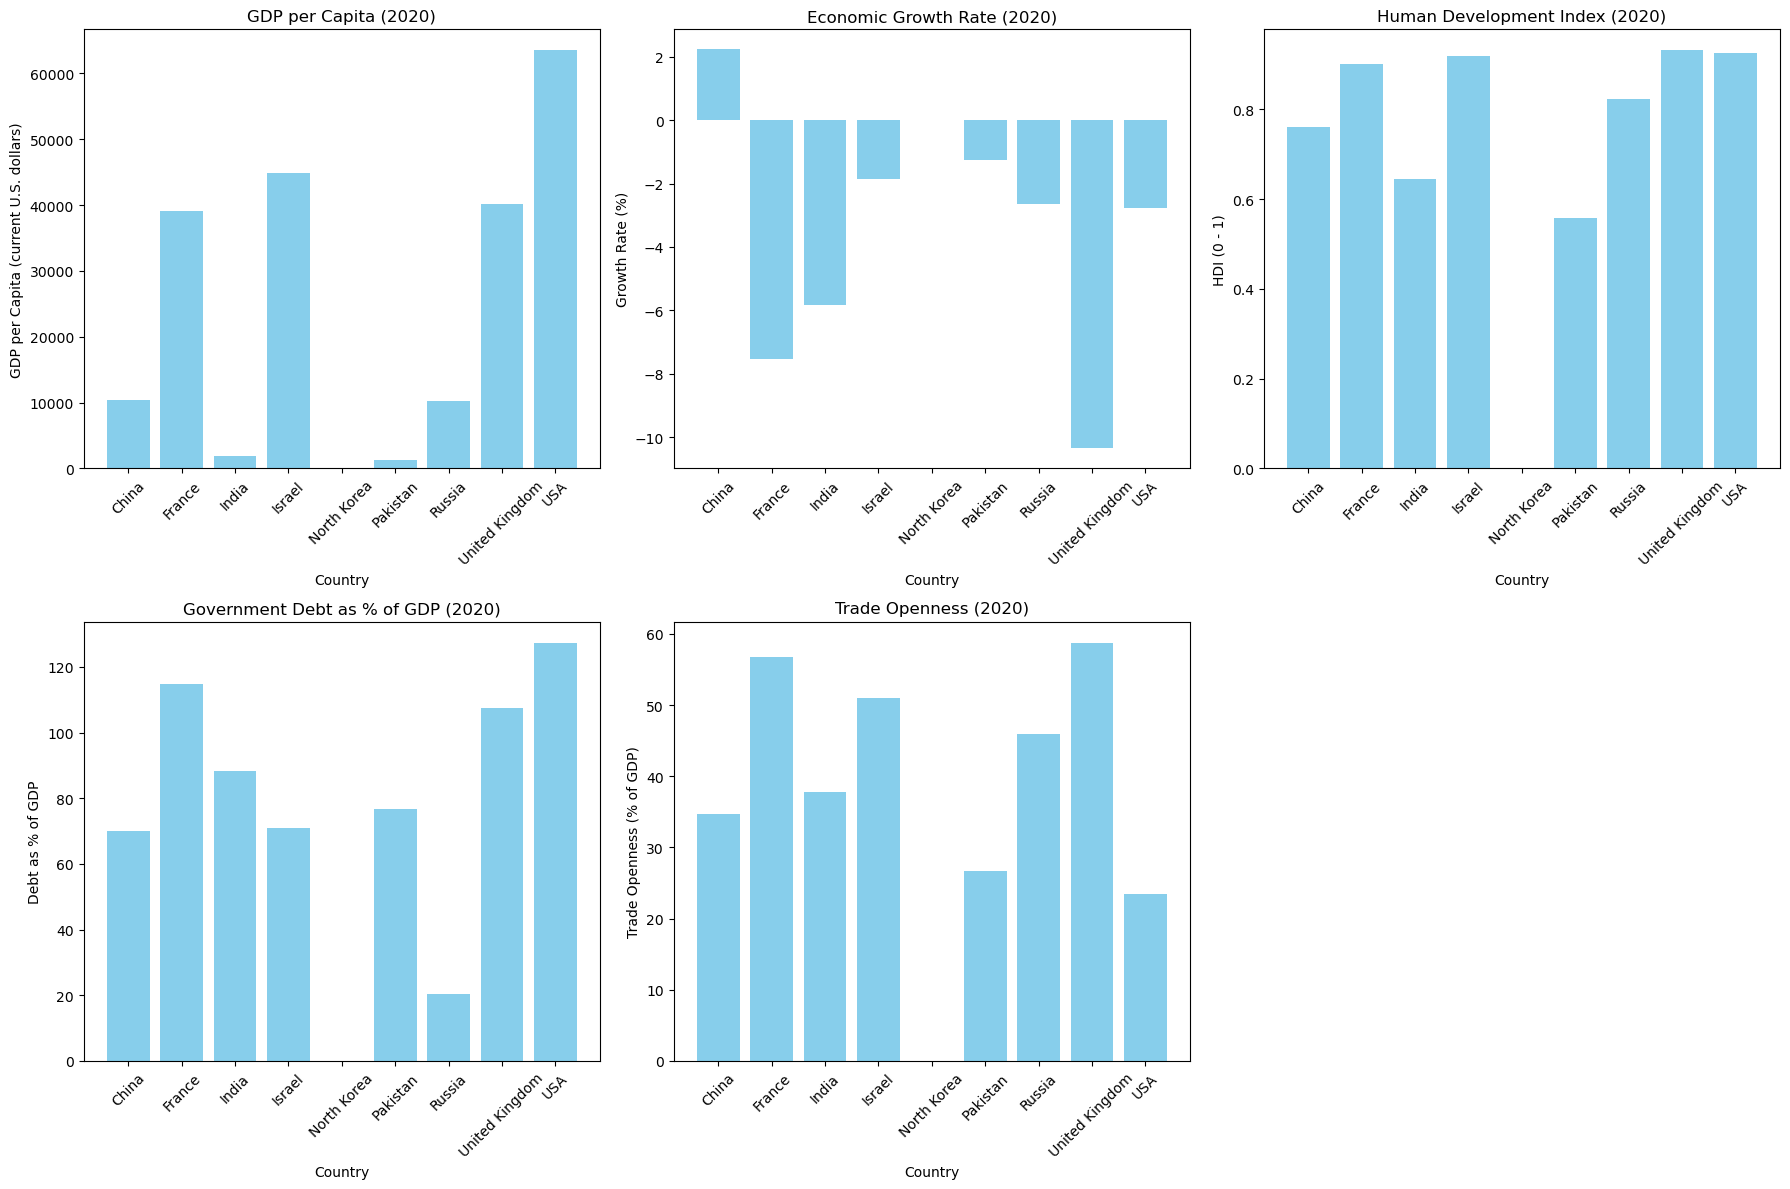

In [25]:
# Filter the data for the recent year to provide a snapshot of current economic health
recent_year = 2020
economic_indicators = ['Country', 'Year', 'GDP per capita current U.S. dollars', 
                       'Economic growth: the rate of change of real GDP', 
                       'Human Development Index (0 - 1)', 
                       'Government debt as percent of GDP', 
                       'Trade openness: exports plus imports as percent of GDP']

economic_health_data = mass_data[(mass_data['Country'].isin(selected_countries_corrected)) & (mass_data['Year'] == recent_year)][economic_indicators]

# Plot comparative analysis for selected economic indicators
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# GDP per Capita
axes[0, 0].bar(economic_health_data['Country'], economic_health_data['GDP per capita current U.S. dollars'], color='skyblue')
axes[0, 0].set_title('GDP per Capita (2020)')
axes[0, 0].set_xlabel('Country')
axes[0, 0].set_ylabel('GDP per Capita (current U.S. dollars)')
axes[0, 0].tick_params(axis='x', rotation=45)

# Economic Growth Rate
axes[0, 1].bar(economic_health_data['Country'], economic_health_data['Economic growth: the rate of change of real GDP'], color='skyblue')
axes[0, 1].set_title('Economic Growth Rate (2020)')
axes[0, 1].set_xlabel('Country')
axes[0, 1].set_ylabel('Growth Rate (%)')
axes[0, 1].tick_params(axis='x', rotation=45)

# Human Development Index (HDI)
axes[0, 2].bar(economic_health_data['Country'], economic_health_data['Human Development Index (0 - 1)'], color='skyblue')
axes[0, 2].set_title('Human Development Index (2020)')
axes[0, 2].set_xlabel('Country')
axes[0, 2].set_ylabel('HDI (0 - 1)')
axes[0, 2].tick_params(axis='x', rotation=45)

# Government Debt as Percent of GDP
axes[1, 0].bar(economic_health_data['Country'], economic_health_data['Government debt as percent of GDP'], color='skyblue')
axes[1, 0].set_title('Government Debt as % of GDP (2020)')
axes[1, 0].set_xlabel('Country')
axes[1, 0].set_ylabel('Debt as % of GDP')
axes[1, 0].tick_params(axis='x', rotation=45)

# Trade Openness
axes[1, 1].bar(economic_health_data['Country'], economic_health_data['Trade openness: exports plus imports as percent of GDP'], color='skyblue')
axes[1, 1].set_title('Trade Openness (2020)')
axes[1, 1].set_xlabel('Country')
axes[1, 1].set_ylabel('Trade Openness (% of GDP)')
axes[1, 1].tick_params(axis='x', rotation=45)

# Hide the unused subplot
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

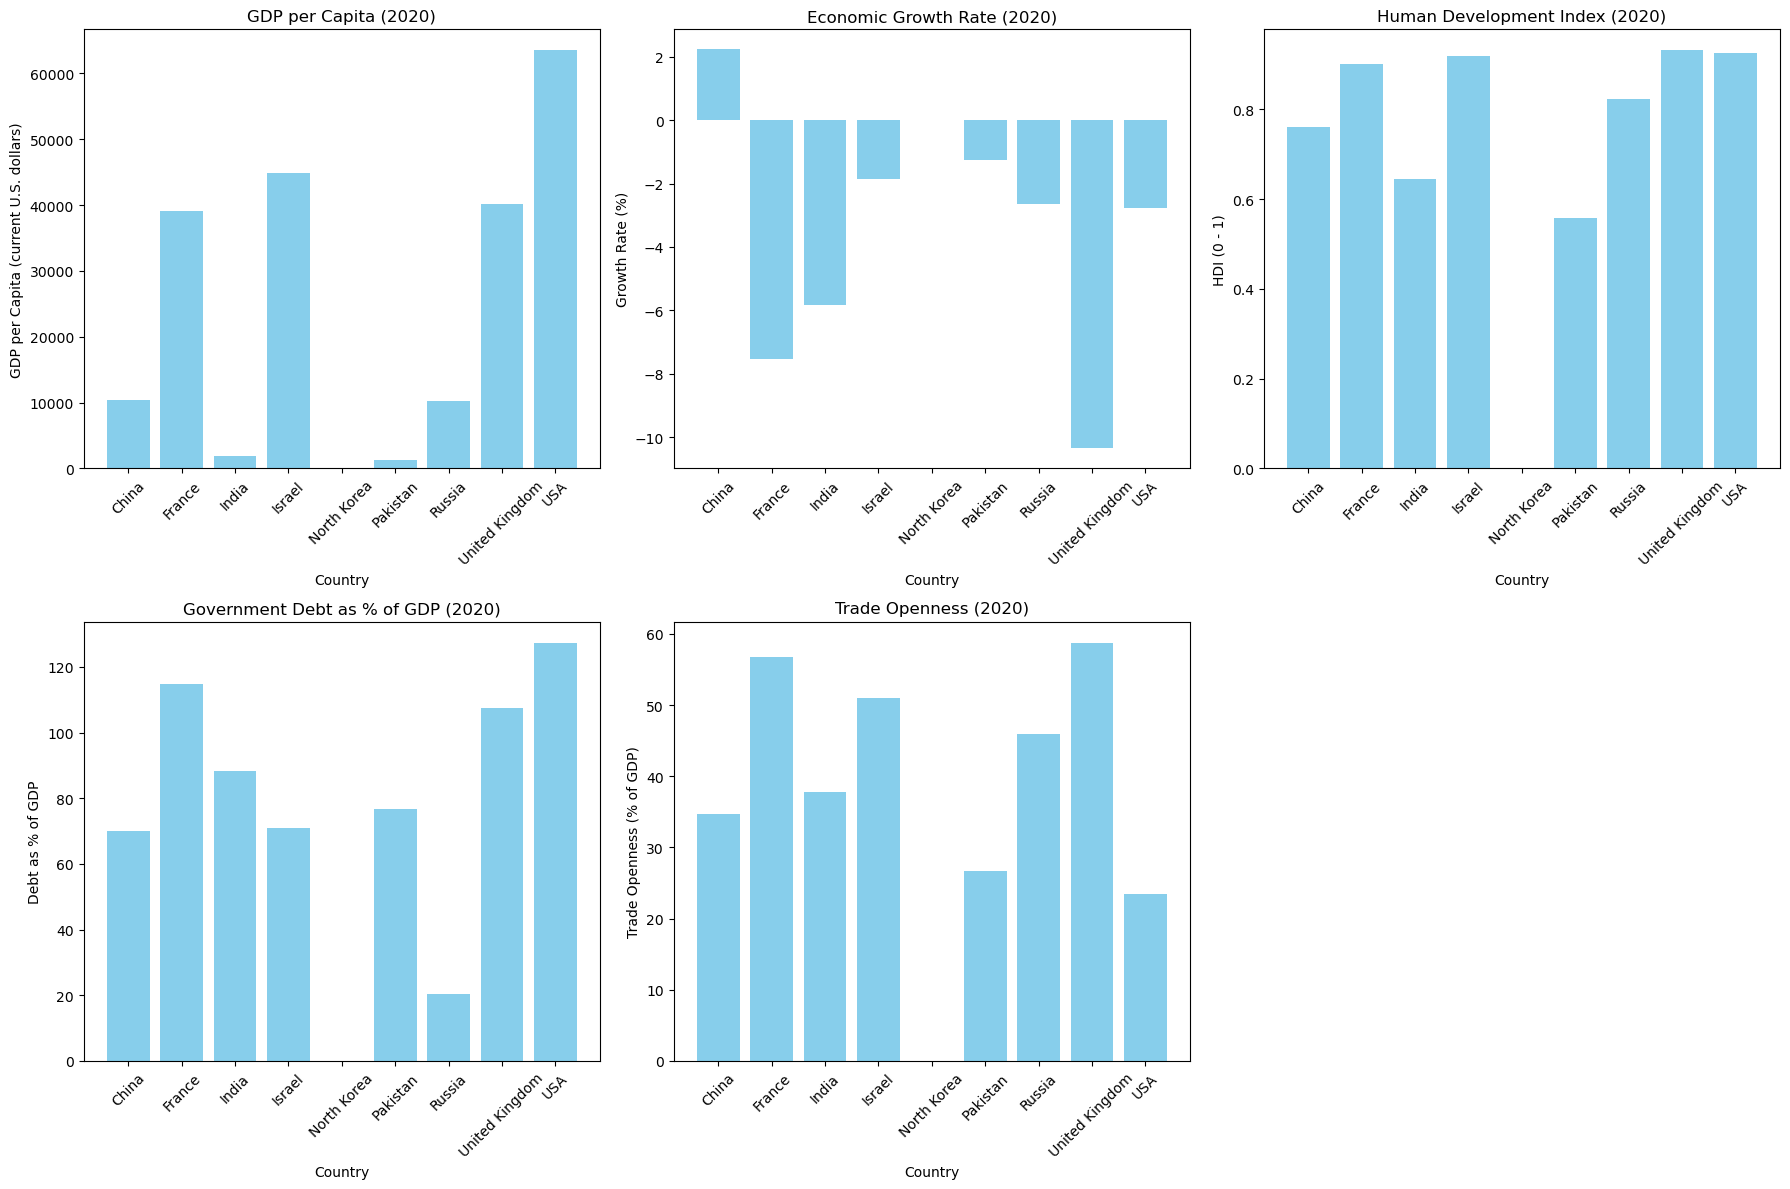

In [ ]:
# Filter the data for the recent year to provide a snapshot of current economic health
recent_year = 2020
economic_indicators = ['Country', 'Year', 'GDP per capita current U.S. dollars', 
                       'Economic growth: the rate of change of real GDP', 
                       'Human Development Index (0 - 1)', 
                       'Government debt as percent of GDP', 
                       'Trade openness: exports plus imports as percent of GDP']

economic_health_data = mass_data[(mass_data['Country'].isin(selected_countries_corrected)) & (mass_data['Year'] == recent_year)][economic_indicators]

# Plot comparative analysis for selected economic indicators
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# GDP per Capita
axes[0, 0].bar(economic_health_data['Country'], economic_health_data['GDP per capita current U.S. dollars'], color='skyblue')
axes[0, 0].set_title('GDP per Capita (2020)')
axes[0, 0].set_xlabel('Country')
axes[0, 0].set_ylabel('GDP per Capita (current U.S. dollars)')
axes[0, 0].tick_params(axis='x', rotation=45)

# Economic Growth Rate
axes[0, 1].bar(economic_health_data['Country'], economic_health_data['Economic growth: the rate of change of real GDP'], color='skyblue')
axes[0, 1].set_title('Economic Growth Rate (2020)')
axes[0, 1].set_xlabel('Country')
axes[0, 1].set_ylabel('Growth Rate (%)')
axes[0, 1].tick_params(axis='x', rotation=45)

# Human Development Index (HDI)
axes[0, 2].bar(economic_health_data['Country'], economic_health_data['Human Development Index (0 - 1)'], color='skyblue')
axes[0, 2].set_title('Human Development Index (2020)')
axes[0, 2].set_xlabel('Country')
axes[0, 2].set_ylabel('HDI (0 - 1)')
axes[0, 2].tick_params(axis='x', rotation=45)

# Government Debt as Percent of GDP
axes[1, 0].bar(economic_health_data['Country'], economic_health_data['Government debt as percent of GDP'], color='skyblue')
axes[1, 0].set_title('Government Debt as % of GDP (2020)')
axes[1, 0].set_xlabel('Country')
axes[1, 0].set_ylabel('Debt as % of GDP')
axes[1, 0].tick_params(axis='x', rotation=45)

# Trade Openness
axes[1, 1].bar(economic_health_data['Country'], economic_health_data['Trade openness: exports plus imports as percent of GDP'], color='skyblue')
axes[1, 1].set_title('Trade Openness (2020)')
axes[1, 1].set_xlabel('Country')
axes[1, 1].set_ylabel('Trade Openness (% of GDP)')
axes[1, 1].tick_params(axis='x', rotation=45)

# Hide the unused subplot
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

	1.	GDP per Capita: The USA has the highest GDP per capita, indicating a high standard of living. The UK, France, and Israel also have high GDP per capita, while China, Russia, India, Pakistan, and North Korea have much lower values.
	2.	Economic Growth Rate: Economic growth rates vary widely among the countries, with some experiencing positive growth and others negative, likely influenced by the global impact of the COVID-19 pandemic.
	3.	Human Development Index (HDI): The USA, UK, France, and Israel have high HDI scores, reflecting higher overall development and well-being. Russia, China, India, Pakistan, and North Korea have lower HDI scores, with North Korea having the lowest.
	4.	Government Debt as Percent of GDP: The UK and the USA have higher levels of government debt relative to their GDP, while other countries have varying, often lower, levels of debt.
	5.	Trade Openness: Israel and the UK show higher trade openness, meaning a larger share of their GDP comes from trade. The other countries display varying levels of trade openness.

Overall, the graphs highlight significant differences in economic health and development among the selected countries.

Summarized Information  
The graphs compare economic indicators for selected countries in 2020. The USA has the highest GDP per capita, with the UK, France, and Israel also high, while China, Russia, India, Pakistan, and North Korea are much lower. HDI scores are highest in the USA, UK, France, and Israel, indicating better overall development. Government debt is highest in the UK and USA. Trade openness is greatest in Israel and the UK, showing their economies are more reliant on trade.